### Student Information
Name: 俞政佑

Student ID: 109080076

GitHub ID: QQbluecatQQ

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [ ]:
### Begin Assignment Here

In [10]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import plotly.graph_objects as go
import nltk
import numpy as np
import nltk
import pandas as pd
import sys
sys.path.append('../helpers')
import data_mining_helpers as dmh

# **take home** Exercise

## Data Preparation

In [12]:

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# 抓資料
twenty_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42)

# 變成 dataframe 
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

###  >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [13]:
#Answer here

# 運用 pandas 的 sample 與 sort_values fumction 隨機從 data 取 10 筆資料並依 category 來排序
X.sample(n=10,replace=False).sort_values(by='category')


,text,category,category_name
971,From: mathew <mathew@mantis.co.uk> Subject: Al...,0,alt.atheism
242,howland.reston.ans.net!europa.eng.gtefsd.com!...,0,alt.atheism
396,From: kmr4@po.CWRU.edu (Keith M. Ryan) Subject...,0,alt.atheism
520,From: livesey@solntze.wpd.sgi.com (Jon Livesey...,0,alt.atheism
821,From: jk87377@lehtori.cc.tut.fi (Kouhia Juhana...,1,comp.graphics
716,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med
1745,From: colby@oahu.cs.ucla.edu (Kenneth Colby) S...,2,sci.med
1758,From: cs89mcd@brunel.ac.uk (Michael C Davis) S...,3,soc.religion.christian
1307,From: HOLFELTZ@LSTC2VM.stortek.com Subject: Re...,3,soc.religion.christian
1710,From: muirm@argon.gas.organpipe.uug.arizona.ed...,3,soc.religion.christian


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [14]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [15]:
# Answer here

# 根據官方文件的說明 : 
# This function takes a scalar or array-like object and indicates whether values are missing 
# (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike). 
# 所以 np.nan 及 none 會包括在其中, 另外在生成 dataframe 時傳入的 dictionary 在對應的 row or column 沒有值的話會自動生成 NaN
# 所以 A B E 會被視為是 missing value
# 但上面的程式中的 'NaN' 'none' ''  會被視為字串, 也就是他在判定時, 他認為這裡有值(字串),雖然這個字串的意思表達了這是缺失值,但在 isnull()的判斷上他並不歸類為缺失值
# 所以 C D F 都是都是屬於有值的(字串), 不被認定為 missing value
# ref
# https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [16]:
# Answer here

# 隨機 sample
X_sample = X.sample(n=1000,random_state=42)

print(X.shape)
print(X_sample.shape)

# print(X_sample)
# print(X)

data = {'A': [1, 2, 3, 4, 5],'B': ['a', 'b', 'c', 'd', 'e']}
df = pd.DataFrame(data)
sampled_df = df.sample(frac=0.8, random_state=42)
print(df)
print(sampled_df)

x_value_dis = X['category_name'].value_counts()/len(X)
xs_value_dis = X_sample['category_name'].value_counts()/len(X_sample)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(x_value_dis)
print(xs_value_dis)

# 1 兩者的 shape 不相同
# 2 兩者內容的相對順序不相同 print 出 X and X_sample 可以發現 X 依照 index 排列, 但 X_smaple 就沒有了, 並且從上面的小測試 code 也能佐證這點
# 3 category 的分布不完全相同但相似


(2257, 3)
(1000, 3)
   A  B
0  1  a
1  2  b
2  3  c
3  4  d
4  5  e
   A  B
1  2  b
4  5  e
2  3  c
0  1  a
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
soc.religion.christian    0.265397
sci.med                   0.263181
comp.graphics             0.258751
alt.atheism               0.212672
Name: category_name, dtype: float64
sci.med                   0.277
soc.religion.christian    0.270
comp.graphics             0.247
alt.atheism               0.206
Name: category_name, dtype: float64


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

Index(['category', 'X', 'X_sample'], dtype='object')
                 category    X  X_sample
0  soc.religion.christian  599       270
1                 sci.med  594       277
2           comp.graphics  584       247
3             alt.atheism  480       206


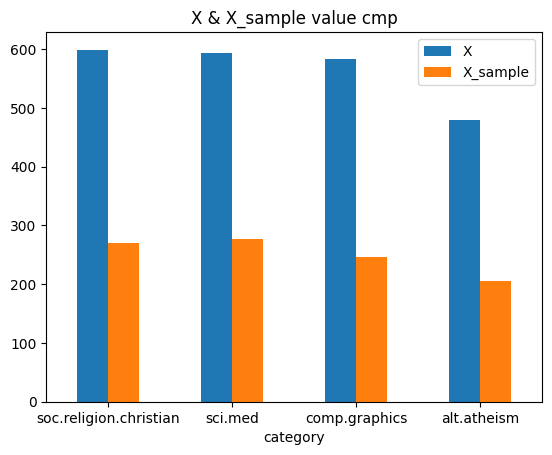

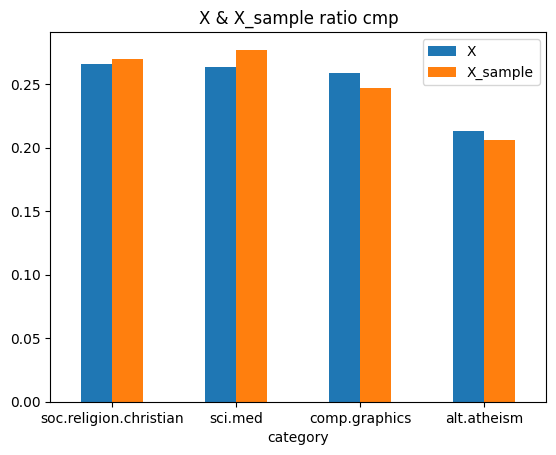

In [17]:
# Answer here

# 把統計結果拿出來 並 改個名
X_c=X.category_name.value_counts()
X_c.name = 'X'
X_s_c=X_sample.category_name.value_counts()
X_s_c.name = 'X_sample'

# 合併成 dataframe
combine = pd.concat([X_c,X_s_c],axis=1)
combine.reset_index(inplace=True)
combine.rename(columns={"index":"category"},inplace=True)
print(combine.columns)
print(combine)

# 弄成圖
combine.plot(x=combine.columns[0],y=combine.columns[1:],kind='bar',rot=0)
plt.title("X & X_sample value cmp")
plt.show()

# 比例的圖
combine_ratio = combine.copy()
combine_ratio["X"]=combine_ratio["X"]/len(X)
combine_ratio["X_sample"]=combine_ratio["X_sample"]/len(X_sample)
combine_ratio.plot(x=combine_ratio.columns[0],y=combine_ratio.columns[1:],kind='bar',rot=0)
plt.title("X & X_sample ratio cmp")
plt.show()


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [18]:
# Answer here

# feature dectect
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

# 先轉換成 np.array
doc5 = X_counts[4, 0:100].toarray()
# 找到非0的 index 
one = np.where(doc5.flatten()==1)
# 因為找第二個非0, 所以 index=1
print(one[0][1])
count_vect.get_feature_names_out()[one[0][1]]

37


'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

(20, 35)


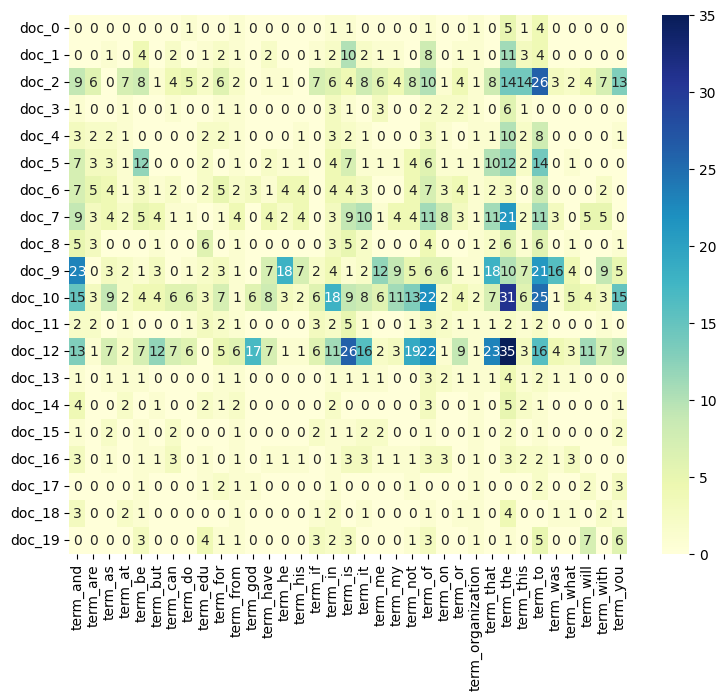

In [19]:
# Answer here

# 如果要以全部的數據來說, 有效的可視化我們可以僅秀出出現頻率最高的 30 種字
# 但這我們將在 excercise 14 練習
# 在此 exercise, 我想以 20 份 doc 與全部的詞語 為練習, 我們設定一個 threshold, 來限定在這 20 份 doc 中, 該詞語出現幾次以上才會被 show 出來

# 我們取第0~19份 doc 作為練習
plot_x_t= ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y_t= ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z_t= X_counts.toarray()[0:20,:] #X_counts[how many documents, how many terms]
df_test = pd.DataFrame(plot_z_t, columns = plot_x_t, index = plot_y_t)

column_sums = df_test.sum()
threshold = 20
selected_columns = column_sums[column_sums > threshold]
df_selected = df_test[selected_columns.index]
print(df_selected.shape)

plt.subplots(figsize=(9, 7))
sns.heatmap(df_selected, annot=True, cmap="YlGnBu")
plt.show()




### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 3)


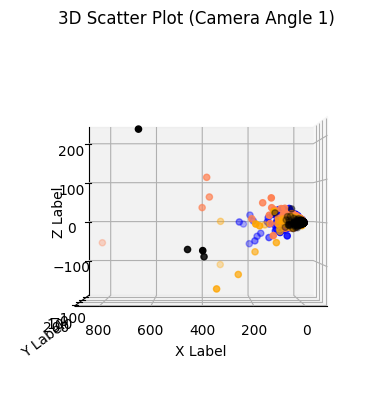

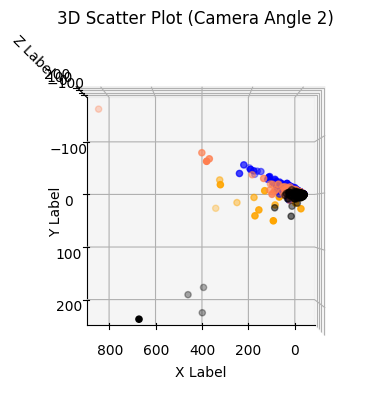

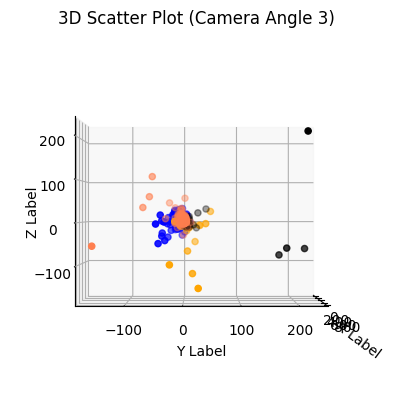

In [20]:
# Answer here

# PCA to 3 dimensions
X_reduced_test = PCA(n_components = 3).fit_transform(X_counts.toarray())

# (2257,3)
print(X_reduced_test.shape)

#  3-D plot for 3 angles(camaras position) 
camera_angles = [(0, 90), (90, 90), (0, 0)]

for i, angle in enumerate(camera_angles):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=angle[0], azim=angle[1])
    col = ['coral', 'blue', 'black', 'orange']
    for c, category in zip(col, categories):
        xs = X_reduced_test[X['category_name'] == category].T[0]
        ys = X_reduced_test[X['category_name'] == category].T[1]
        zs = X_reduced_test[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o')

    # plot
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    plt.title(f"3D Scatter Plot (Camera Angle {i+1})")
    plt.show()

# 我們可以發現
# 所有點的分布都很集中, 且沒有很明顯的分群
# 代表這些點的特徵並沒有很太過明顯的差異, 
# 但也可能因低維度的關係, 使得我們無法看出明顯的分群, 失去了更細節的資訊


### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [21]:
# Answer here

# term frequency
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Create a Plotly figure
fig = go.Figure()

# Add a bar trace
fig.add_trace(go.Bar(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies[:300]
))

# Update layout
fig.update_layout(
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=4)),
    
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)

# Show the figure
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [22]:
# Answer here

# 為了有效的減少出現的 terms, 我決定以出現頻率前 30 名的 terms 來做為練習
# 取出前 30 名的 terms

term_frequencies_test = np.asarray(X_counts.sum(axis=0))[0]
# 順便降序 等等 exercise  可能會用到
top_30 = np.argsort(term_frequencies_test)[::-1][:30]
# 拉出前 30 名的 terms
terms  = count_vect.get_feature_names_out()[top_30]
times = term_frequencies_test[top_30]
print(times)
print(terms)

import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add a bar trace
fig.add_trace(go.Bar(
    x=terms,
    y=times
))

# Update layout
fig.update_layout(
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=12)),
    
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)

# Show the figure
fig.show()




[29825 17660 17222 13017 12343 11226 10723  8447  6157  5962  5285  5063
  4898  4877  4769  4675  4218  4015  3709  3655  3453  3432  3208  3020
  2818  2674  2556  2548  2472  2464]
['the' 'of' 'to' 'and' 'is' 'in' 'that' 'it' 'you' 'for' 'not' 'this' 'be'
 'from' 'are' 'edu' 'have' 'as' 'on' 'with' 'but' 'or' 'if' 'was' 'can'
 'we' 'there' 'by' 'what' 'subject']


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [23]:
# Answer here
# Answer here

# 和 14 相同方法 但就不用拉 top 30 了
# 但我打算拉 top 300 原因是全取的話 term 太多, bar 會太細看不到

term_frequencies_15 = np.asarray(X_counts.sum(axis=0))[0]
# 順便降序 等等 exercise  可能會用到
descending_order= np.argsort(term_frequencies_15)[::-1][:300]
terms  = count_vect.get_feature_names_out()[descending_order]
times = term_frequencies_test[descending_order]

print(times)
print(terms)


# Create a Plotly figure
fig = go.Figure()

# Add a bar trace
fig.add_trace(go.Bar(
    x=terms,
    y=times
))

# Update layout
fig.update_layout(
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=4)),
    
    title="Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)

# Show the figure
fig.show()



[29825 17660 17222 13017 12343 11226 10723  8447  6157  5962  5285  5063
  4898  4877  4769  4675  4218  4015  3709  3655  3453  3432  3208  3020
  2818  2674  2556  2548  2472  2464  2448  2393  2353  2312  2232  2216
  2193  2192  2191  2186  2172  2148  2143  2093  2000  1925  1912  1802
  1793  1791  1742  1671  1669  1645  1604  1599  1543  1453  1400  1318
  1286  1278  1230  1215  1213  1184  1177  1170  1151  1142  1130  1127
  1100  1090  1068  1045  1028   989   959   952   914   892   885   870
   852   851   850   850   841   840   825   814   811   808   806   805
   805   803   772   766   765   763   754   745   739   730   729   722
   719   710   686   676   650   649   646   628   619   613   603   598
   597   594   588   576   565   559   558   557   557   556   551   546
   545   542   541   531   531   521   517   512   504   501   500   496
   496   495   492   490   489   488   482   479   474   472   463   462
   459   456   456   451   448   448   446   442   

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [24]:
# Answer here

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:20]

# it works !!

,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"


# --------我是分隔線--------

# homework 2

### load data 與 創造 dataframe and cleaning

In [25]:
# load data

# 文件路径
file_1 = "../dataset/amazon_cells_labelled.txt"
file_2 = "../dataset/imdb_labelled.txt"
file_3 = "../dataset/yelp_labelled.txt"

# 读取数据
df_1 = pd.read_csv(file_1, sep='\t', header=None, names=['Sentence', 'Label'])
df_2 = pd.read_csv(file_2, sep='\t', header=None, names=['Sentence', 'Label'])
df_3 = pd.read_csv(file_3, sep='\t', header=None, names=['Sentence', 'Label'])

# 合併成 dataframe
data_df= pd.concat([df_1, df_2, df_3], ignore_index=True)

# 雖然三個檔案共 3000 行, 但因為 imdb_labelled.txt 有很多句子超過 1 行, 所以實際上的句子數量會比 3000 少

# 2748*2
print(data_df.shape)

# 檢查是否有缺失值
print()
print("data 是否有缺失值")
print(data_df.isnull().sum())

# 檢查有無重複的句子
print()

# 留下第一次出現的句子, print 出重複的數量 (就是要刪除的數量)
print("有重複的值: ",data_df.duplicated(subset=['Sentence']).sum())

# print 出重複的句子, 包含他是第一次出現, 所以她數量會大於上面測量的值
print(data_df[data_df.duplicated(subset=['Sentence'], keep=False)])

# drop 重複的句子
data_df.drop_duplicates(subset=['Sentence'],inplace=True,ignore_index=True)

print(data_df.shape)


(2748, 2)

data 是否有缺失值
Sentence    0
Label       0
dtype: int64

有重複的值:  17
                                               Sentence  Label
18                                        Works great!.      1
179   If you like a loud buzzing to override all you...      0
180                             Don't buy this product.      0
187                                       Great phone!.      1
262                                        Works great.      1
285                                       Great phone!.      1
290                                        Great Phone.      1
392                               This is a great deal.      1
402                    Excellent product for the price.      1
407                                        Works great.      1
446                                       Does not fit.      0
524                                       Works great!.      1
543                             Don't buy this product.      0
647                                       

### data preprocessing 

關於 **sample** **feature** **Attribute Transformation** ...... 等我想大多數會與 homework 3-1 visualization 重疊, 如果提早移來這裡, 反而 code 會不連貫而斷斷續續, 不易閱讀, 所以就不在此多說明一次, 關於 data preprocessing 的操作的將蘊含在 homework 3-1 visualization 中


# homework 3 task

## task 1 visualizations 

### 我們將可視化 **句子長度** 與 **情緒關係**
從結果的圖來看, 可以發現並沒有太大的關係

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                               Sentence  Label  num_terms
0     So there is no way for me to plug it in here i...      0         22
1                           Good case, Excellent value.      1          6
2                                Great for the jawbone.      1          5
3     Tied to charger for conversations lasting more...      0         13
4                                     The mic is great.      1          5
...                                                 ...    ...        ...
2726  I think food should have flavor and texture an...      0         13
2727                           Appetite instantly gone.      0          4
2728  Overall I was not impressed and would not go b...      0         11
2729  The whole experience was underwhelming, and I ...      0         19
2730  Then, as if I hadn't wasted enough of my life ...      0         32

[2731 rows x 3 columns]


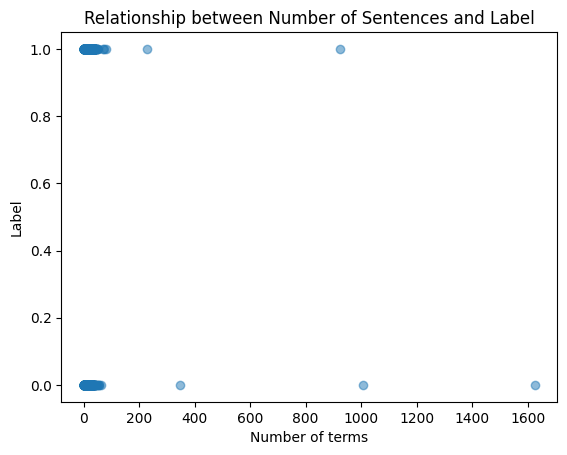

In [26]:
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# 計算每個句子的字與標點符號數量
data_df['num_terms'] = data_df['Sentence'].apply(lambda x: len(nltk.word_tokenize(x)))
print(data_df)

# 畫圖: 換 x 軸為詞,標點數量, y 軸為 label 0 or 1 

labels = data_df['Label']
num_sentences = data_df['num_terms']

# 繪製散點圖
plt.scatter(num_sentences, labels, alpha=0.5)
plt.xlabel('Number of terms')
plt.ylabel('Label')
plt.title('Relationship between Number of Sentences and Label')
plt.show()


### 我們將可視化 positive and negative 的句子上, 常出現的 feature 是甚麼

但我們可以發現, 其實前 30 名的 terms 有很多都不大具有意義, 因此, 我們取 8 ~ 70 的名次

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# 把對應的 label 句子取出來 
s_n = data_df[data_df['Label']==0]['Sentence']
s_p = data_df[data_df['Label']==1]['Sentence']  

# sample 出來看一下
print(s_p.sample(n=10,replace=False))


# 建立 feature matrix
count_n = CountVectorizer()
count_p = CountVectorizer()
s_n_f= count_n.fit_transform(s_n)
s_p_f= count_p.fit_transform(s_p)
print(s_n_f.shape)
print(s_p_f.shape)

# 算 frequency
frequency_n_= np.asarray(s_n_f.sum(axis=0))[0]
frequency_p= np.asarray(s_p_f.sum(axis=0))[0]

low = 8
top = 70
# 和 excersice 14 相似, 取出 20 ~ 70  名的 terms
n_top_30 = np.argsort(frequency_n_)[::-1][low:top]
p_top_30 = np.argsort(frequency_p)[::-1][low:top]

# 拉出前 30 名的 terms
n_terms_30  = count_n.get_feature_names_out()[n_top_30]
p_terms_30 = count_p.get_feature_names_out()[p_top_30]

n_frequency_30 = frequency_n_[n_top_30]
p_frequency_30 = frequency_p[p_top_30]

1698      The film's dialogue is natural, real to life.  
291                                      Excellent Phone.
1335    It's just adorable seeing Mickey playing "Turk...
53      This phone is pretty sturdy and I've never had...
2628                I had strawberry tea, which was good.
2112    In an interesting part of town, this place is ...
1672    They are so easy to love, but even more easy t...
1879    Nice blanket of moz over top but i feel like t...
2127    I have been here several times in the past, an...
1503    The success of the film depends on the casting...
Name: Sentence, dtype: object
(1355, 3348)
(1376, 3292)


In [28]:
# ploty 作圖
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=n_terms_30,
    y=n_frequency_30,
))
fig.update_layout(
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=10)),
    
    title="Negative Sentence Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.show()

In [29]:
# ploty 作圖
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(
    x=p_terms_30,
    y=p_frequency_30,
))
fig.update_layout(
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=10)),
    
    title="Positive Sentence Term Frequencies",
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)
fig.show()

### 我們改用詞雲的方式來顯現看看

詞雲不會顯示停用詞 ex the you is she 等 所以不用取前30名

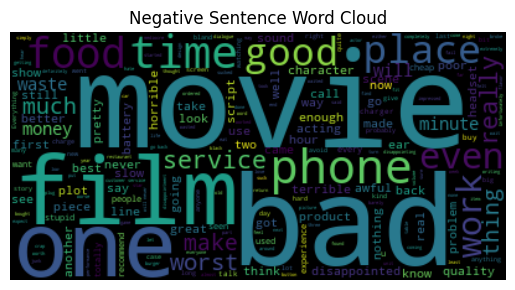

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

t_s_n = s_n.str.cat(sep=' ')
wordcloud_n= WordCloud().generate(t_s_n)
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.title("Negative Sentence Word Cloud")
plt.axis('off')
plt.show()

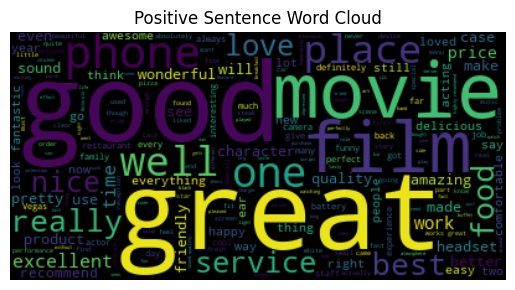

In [31]:
t_s_p = s_p.str.cat(sep=' ')
wordcloud_p= WordCloud().generate(t_s_p)
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.title("Positive Sentence Word Cloud")
plt.axis('off')
plt.show()

### Dimensionality Reduction

發現分布集中

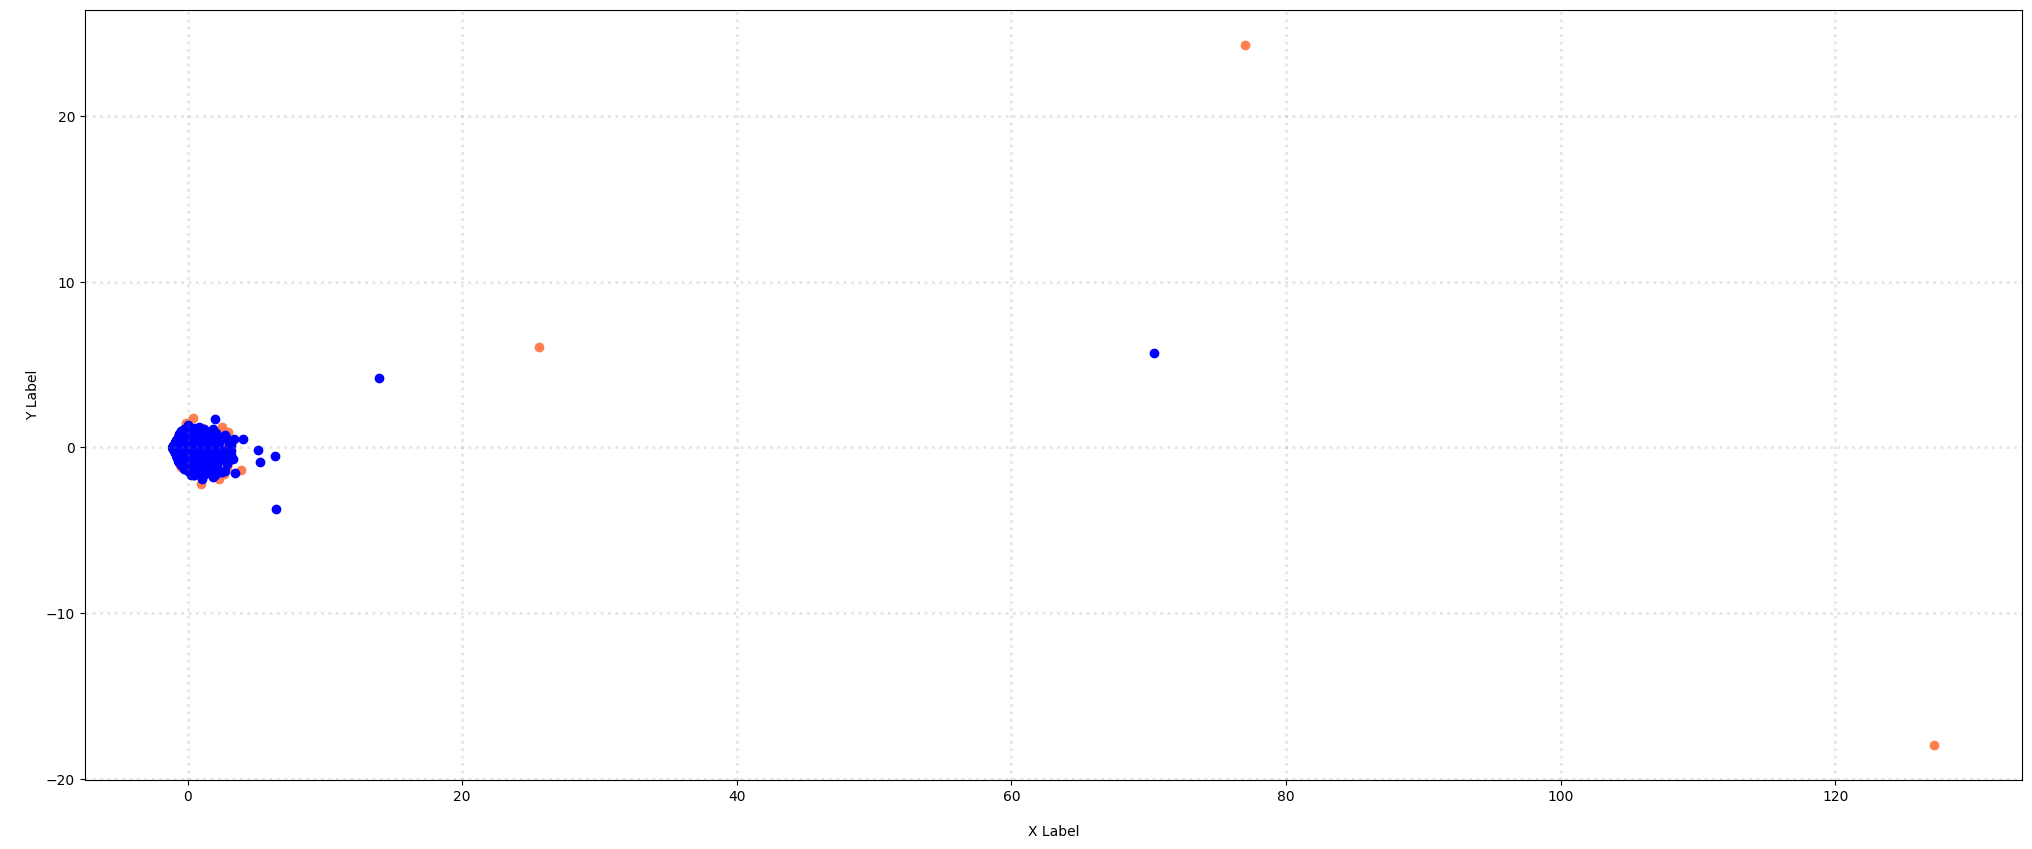

In [40]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
data_countvectorizer = CountVectorizer()
data_cout_pca = data_countvectorizer.fit_transform(data_df['Sentence'])
data_reduce = PCA(n_components = 2).fit_transform(data_cout_pca.toarray())

col = ['coral', 'blue']
label_pca = [0, 1]
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
for c, label in zip(col, label_pca):
    xs = data_reduce[data_df['Label'] == label].T[0]
    ys = data_reduce[data_df['Label'] == label].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()



### task 2  TF-IDF features

In [32]:
# 產生 TF-IDF 矩陣
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v= TfidfVectorizer()
tfidf_matrix = tfidf_v.fit_transform(data_df.Sentence)
print(tfidf_matrix[0:1])

  (0, 1013)	0.3974247626706531
  (0, 647)	0.22552149089185877
  (0, 1982)	0.23061573681226913
  (0, 4793)	0.3303965752179821
  (0, 4835)	0.2734078791282181
  (0, 4531)	0.08804875081176543
  (0, 2158)	0.22091318490920206
  (0, 2314)	0.3008057081827911
  (0, 2432)	0.12092348822270317
  (0, 3387)	0.3069219728545536
  (0, 4609)	0.1277326976526284
  (0, 2809)	0.22836646536189845
  (0, 1829)	0.15613426890690182
  (0, 4987)	0.24797095343745884
  (0, 3043)	0.2234924959811106
  (0, 2427)	0.12237411553084603
  (0, 4545)	0.2102498059634154
  (0, 4161)	0.18646625292056324


In [33]:
# 產生 frequency 矩陣
from sklearn.feature_extraction.text import CountVectorizer
count_v = CountVectorizer()
frequency_matrix= count_v.fit_transform(data_df.Sentence)
print(frequency_matrix[0:1])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


### task 3 Naive Bayes classifier

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#### 切分資料 ####

train_x, test_x, train_y, test_y = train_test_split(tfidf_matrix, data_df.Label, test_size=0.2, random_state=42)

train_x_f, test_x_f, train_y_f, test_y_f = train_test_split(frequency_matrix, data_df.Label, test_size=0.2, random_state=42)


###### TF-IDF ######
clf_t = MultinomialNB()
clf_t.fit(train_x, train_y)
pred_t = clf_t.predict(test_x)
score_t = accuracy_score(test_y, pred_t)
print("tfidf score: ",score_t)

######### frequency #########
clf_f = MultinomialNB()
clf_f.fit(train_x_f, train_y_f)
pred_f = clf_f.predict(test_x_f)
score_f = accuracy_score(test_y_f, pred_f)
print("frequency score: ",score_f)




tfidf score:  0.8043875685557587
frequency score:  0.7879341864716636


In [35]:
# using the classifier

def classify(sentence,method,clf_t,clf_f):
    labels = {0: 'negative', 1: 'positive'}
    input = [sentence]
    if(method=='tfidf'):
        input = tfidf_v.transform(input).toarray()
        model = clf_t
    elif(method=='frequency'):
        input = count_v.transform(input).toarray()
        model = clf_f
    prediction = model.predict(input)
    print("Input: %s, Sentiment: %s" % (sentence, labels[prediction[0]]))
    return prediction[0]

# let's try
def dataset_test(clf_t,clf_f):
    q_index = int(input("想要進行題目 index 0~2731 沒有防呆機制請小心輸入"))
    method = input("tfidf or frequency")
    ans = classify(data_df.Sentence[q_index],method=method,clf_t=clf_t,clf_f=clf_f)
    if ans == data_df.Label[q_index]:
        print("correct")
    else:
        print("wrong")

def personal_test(clf_t,clf_f):
    method = input("tfidf or frequency")
    sentence = input("請輸入一個句子")
    classify(sentence,method=method,clf_t=clf_t,clf_f=clf_f)

In [36]:
dataset_test(clf_t,clf_f)

Input: I have to jiggle the plug to get it to line up right to get decent volume., Sentiment: negative
correct


In [37]:
personal_test(clf_t,clf_f)

Input: lalalala, Sentiment: positive


In [38]:
# 以 TF-IDF 與 frequcy 為輸入資料的 classifier, 以結果來看, TF-IDF 的準確率較高一些, 但並不是相差很多
# 兩者的最主要的差異是在於去 fit 的資料不同, 也就是 document matrix 不同, 因為兩者的計算方式不一樣
# 這當然就會影響到預測的結果, 以這個 dataset 來說是優化了一些些, 但沒有很明顯大躍進
# 不過在 personal_test 時, 我們輸入一些自己想要 test 的句子, 會發現有些句子的預測結果是錯誤的
# 我想這是因為這個 dataset 的資料量不夠大, 且句子的結構也不夠複雜, 所以導致預測的結果不夠準確
# 並且只看 frequency 或 TF-IDF 也不足以判斷一個句子的情緒, 畢竟目前的 model 還是太過簡單
# 沒有辦法連結字與字之間的關係, 也沒有辦法理解句子的結構, 所以在預測上會有一些限制

### homework 4 修正 data preprocessing

1. 首先我認為 exercise 8 的範例圖是錯, 依據以存在的 template code, X_sample 的值沒有和圖對應到

2. 在 5.5 的部分, 可視化出來的不具有太多的 meaing, 仔細看 x 軸的數值, 會發現他們都是沒有意義的數字阿! 我想我在 exercise 14 用的方法取出前30名常見的 terms 會是一個不錯的想法

3. 第二點雖然是不錯的想法, 因為最常出現的詞很多是**停用詞** ex the is she 等, 不太具有意義, 所以我在 homework 3-1 可視化的部分, 又更進一步的優化, 對其顯現 8~70 名的 terms, 可以去除一些不重要的詞

4. 然而第三點有個缺點, 他不是自動的, 因為這樣的方法還是需要人工先行觀察大概到那些排名開始才出現那些比較有意義的詞, 因此我再進一步進行修正, 以 `worldcloud` 的 fuction 來呈現, 它會自動的去除掉停用詞, 至此, 在可視化常出現詞的部分我認為可以顯示的還不錯了

### homework 5 comment and code cleaning

1. 正如我在 homework 3-1 的部分所說, 我省略了一些重疊的部分, 使 code 不要離的太遠, 使讀者較好閱讀

2. 程式碼幾乎都有 comment